In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [51, 49]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([43., 57.])

In [4]:
Multinomial(100, fair_probs).sample() / 100


tensor([0.4600, 0.5400])

In [5]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5089, 0.4911])

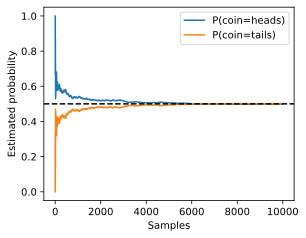

In [6]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [7]:
counts, cum_counts

(tensor([[1., 0.],
         [1., 0.],
         [0., 1.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]]),
 tensor([[1.0000e+00, 0.0000e+00],
         [2.0000e+00, 0.0000e+00],
         [2.0000e+00, 1.0000e+00],
         ...,
         [4.9890e+03, 5.0090e+03],
         [4.9890e+03, 5.0100e+03],
         [4.9890e+03, 5.0110e+03]]))